## <b> <span style='color:#e61227'>|</span> Traffic Signs Detection Using YOLOv8 </b> 

![](https://learnopencv.com/wp-content/uploads/2023/01/evolution-of-yolo-models-1024x576.png)

## <b>1 <span style='color:#e61227'>|</span> Introduction</b> 

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#e61227''>1.1 |</span></b> Object Detection </b></p>
</div>

**Computer vision** is a field of artificial intelligence that focuses on teaching computers to interpret and understand visual information. One popular and powerful technique used in computer vision for object detection is called **YOLO**, which stands for "You Only Look Once".

YOLO aims to identify and locate objects in an image or video stream in real-time. Unlike traditional methods that rely on complex pipelines and multiple passes, YOLO takes a different approach by treating object detection as a single regression problem.

This algorithm divides the input image into a grid and predicts bounding boxes and class probabilities for objects within each grid cell. It simultaneously predicts the class labels and their corresponding bounding boxes, making it incredibly efficient and fast. YOLO is known for its real-time performance, enabling it to process images and videos at impressive speeds.

By leveraging **deep convolutional neural networks**, YOLO can learn to recognize a wide range of objects and accurately localize them within an image. It can detect multiple objects of different classes simultaneously, making it particularly useful for applications where **real-time processing** and high detection accuracy are crucial, such as **autonomous driving**, **video surveillance**, and **robotics**.


<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#e61227''>1.2 |</span></b> YOLOv8 </b></p>
</div>

**YOLOv8** is the latest version of the YOLO AI model developed by **Ultralytics**, which has shown effectiveness in tackling tasks such as **classification**, **object detection**, and **image segmentation**. **YOLOv8 models** are fast, accurate, and easy to use, making them ideal for various object detection and image segmentation tasks. They can be trained on large datasets and run on diverse hardware platforms, from **CPUs** to **GPUs**.
YOLOv8 _detection_ models have no suffix and are the default YOLOv8 models, i.e. **yolov8n.pt** ,and are pre-trained on COCO. See [Detection Docs ](https://docs.ultralytics.com/tasks/detect/) for full details.

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#e61227'>1.3 |</span></b> Study Aim </b></p>
</div>

Implementing **Sign Detection** using **YOLOv8** holds tremendous potential across a wide range of practical applications. For example, it can greatly enhance **traffic management systems**, allowing for the efficient detection and recognition of various traffic signs. This technology can play a vital role in improving road safety by enabling vehicles to accurately interpret and respond to the information conveyed by road signs. Moreover, sign detection using YOLOv8 can assist in urban planning and infrastructure development by analyzing the presence and condition of signs in different areas

By undertaking this project, I aimed to harness the power of YOLOv8 to develop a **reliable signs detection solution** with the potential to improve various domains that rely on precise and efficient signs identification.


## <b>2 <span style='color:#e61227'>|</span> Install And Import Essential Libreries</b> 


In [21]:
# Install Essential Libraries
!pip install ultralytics

In [22]:
# Import Essential Libraries
import os
import random
import pandas as pd
from PIL import Image
import cv2
from ultralytics import YOLO
from IPython.display import Video
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
import pathlib
import glob
from tqdm.notebook import trange, tqdm
import warnings
warnings.filterwarnings('ignore')

In [23]:
# Configure the visual appearance of Seaborn plots
sns.set(rc={'axes.facecolor': '#eae8fa'}, style='darkgrid')

## <b>3 <span style='color:#e61227'>|</span> Dataset</b> 

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#e61227'>3.1 |</span></b> Show Original Images Before Detect </b></p>
</div>

***3.1.1. Show Some Images From TrainSet***

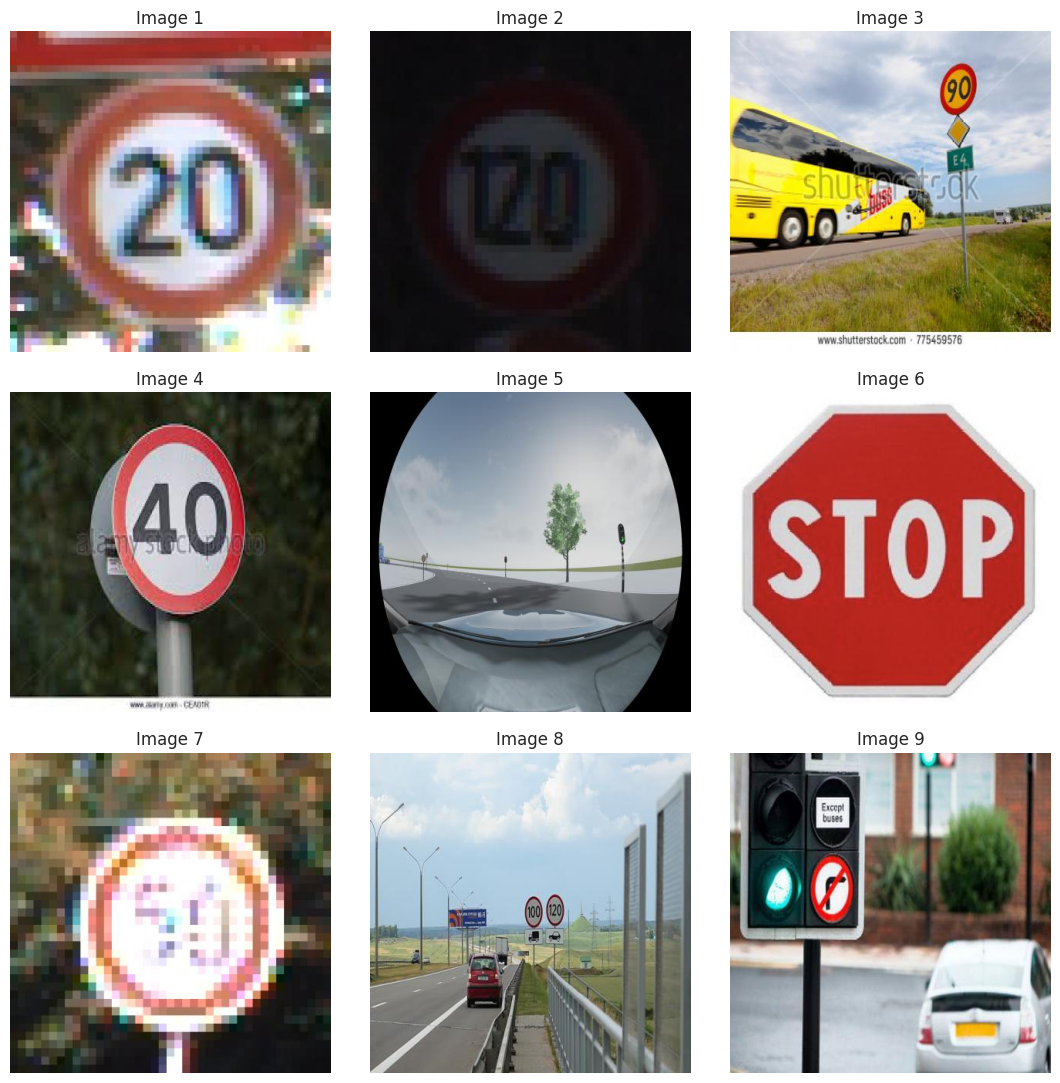

In [24]:
Image_dir = '/kaggle/input/cardetection/car/train/images'

num_samples = 9
image_files = os.listdir(Image_dir)

# Randomly select num_samples images
rand_images = random.sample(image_files, num_samples)

fig, axes = plt.subplots(3, 3, figsize=(11, 11))

for i in range(num_samples):
    image = rand_images[i]
    ax = axes[i // 3, i % 3]
    ax.imshow(plt.imread(os.path.join(Image_dir, image)))
    ax.set_title(f'Image {i+1}')
    ax.axis('off')

plt.tight_layout()
plt.show()

***3.1.2. Get Shape Of An Image For Using In Training Step***

In [25]:
# Get the size of the image
image = cv2.imread("/kaggle/input/cardetection/car/train/images/00000_00000_00012_png.rf.23f94508dba03ef2f8bd187da2ec9c26.jpg")
h, w, c = image.shape
print(f"The image has dimensions {w}x{h} and {c} channels.")

The image has dimensions 416x416 and 3 channels.


## <b>4 <span style='color:#e61227'>|</span> Try Pre-trained YOLOv8 For Detect Traffic Signs  </b>


image 1/1 /kaggle/input/cardetection/car/train/images/FisheyeCamera_1_00228_png.rf.e7c43ee9b922f7b2327b8a00ccf46a4c.jpg: 640x640 (no detections), 5.9ms
Speed: 2.3ms preprocess, 5.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


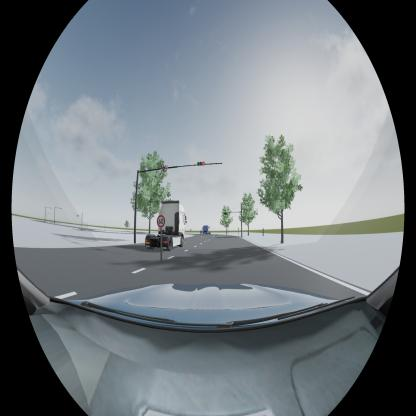

In [26]:
# Use a pretrained YOLOv8n model
model = YOLO("yolov8n.pt") 

# Use the model to detect object
image = "/kaggle/input/cardetection/car/train/images/FisheyeCamera_1_00228_png.rf.e7c43ee9b922f7b2327b8a00ccf46a4c.jpg"
result_predict = model.predict(source = image, imgsz=(640))

# show results
plot = result_predict[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))

## <b>5 <span style='color:#e61227'>|</span> YOLOv8-Based Traffic Signs Detection Model</b>
<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#e61227''>5.1 |</span></b> Model Training Using Customized Dataset Of Traffic Signs </b></p>
</div>
        
***Mean Average Precision (mAP)*** is a metric used to evaluate the effectiveness of object detection algorithms in identifying and locating objects within images. It takes into account both precision and recall across different categories. By calculating the Average Precision (AP) for each category and taking the average, mAP provides an overall assessment of the algorithm's performance.

If the obtained mAP after the final epoch is not satisfactory, there are several options available to improve the results:
- Extending the training process by increasing the number of **epochs**: Training for more epochs allows the model to learn more patterns and potentially improve its performance. You can specify a higher value for the --epochs argument when running the training command.
- Experimenting with different **parameter values**: You can try adjusting various parameters to see if they have a positive impact on the results. Some parameters to consider are:
- **Batch Size:** Changing the batch size can affect the convergence and generalization of the model. You can modify the --batch-size argument to find an optimal value.
- **Initial Learning Rate (lr0)**: The initial learning rate determines the step size at the beginning of the training process. You can tune the --lr0 parameter to control how quickly the model learns.
- **Learning Rate Range (lrf)**: The learning rate range determines the range of learning rates used during the training. Experimenting with different values for --lrf can help find a better learning rate schedule.
- **Selecting a different optimizer**: The optimizer is responsible for updating the model's parameters based on the calculated gradients. Changing the optimizer can sometimes lead to better convergence and results. Ultralytics YOLOv8 supports different optimizers such as SGD, Adam, and RMSprop. You can try using a different optimizer by modifying the --optimizer argument.

For more details on resuming interrupted trainings and additional training options, you can refer to the Ultralytics YOLOv8 documentation.
        
In order to optimize the performance of the model, we have conducted experiments with different parameter values and optimizers. During the training phase, I explored various combinations of epochs, batch sizes, initial learning rates (lr0), and dropout values. The following values were used for experimentation:

- Epochs: ***10***, ***50***, ***100***
- Batch sizes: ***8***, ***16***, ***32***, ***64***
- Initial learning rates (lr0): ***0.001***, ***0.0003***, ***0.0001***
- Dropout: ***0.15***, ***0.25***

Furthermore, we have evaluated the model's performance using different optimizers, including **Adam**, **SGD**, and **auto**. By employing these optimizers, we aimed to assess their impact on the model's convergence and overall results.

After rigorous experimentation and training, we are pleased to present the results of our findings. The performance of the YOLOv8 model was assessed based on various metrics, including Mean Average Precision (mAP). 


***5.1.1. Training Step***

In [27]:
!pip install --upgrade ultralytics ray


In [28]:
# Build from YAML and transfer weights
Final_model = YOLO('yolov8n.pt')  

# Training The Final Model
Result_Final_model = Final_model.train(data="/kaggle/input/cardetection/car/data.yaml",epochs = 30, batch = -1, optimizer = 'auto')


Ultralytics 8.3.107 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/kaggle/input/cardetection/car/data.yaml, epochs=30, time=None, patience=100, batch=-1, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_bo

train: Scanning /kaggle/input/cardetection/car/train/labels... 3530 images, 3 backgrounds, 0 corrupt: 100%|██████████| 3530/3530 [00:04<00:00, 796.36it/s]


train: WARNING ⚠️ Cache directory /kaggle/input/cardetection/car/train is not writeable, cache not saved.
albumentations: ImageCompression.__init__() got an unexpected keyword argument 'quality_range'
AutoBatch: Computing optimal batch size for imgsz=640 at 60.0% CUDA memory utilization.
AutoBatch: CUDA:- (Tesla P100-PCIE-16GB) 15.89G total, 0.69G reserved, 0.17G allocated, 15.04G free
      Params      GFLOPs  GPU_mem (GB)  forward (ms) backward (ms)                   input                  output
     3013773       8.209         0.445         19.75         43.46        (1, 3, 640, 640)                    list
     3013773       16.42         0.612         17.87          46.6        (2, 3, 640, 640)                    list
     3013773       32.84         0.942         20.12         51.36        (4, 3, 640, 640)                    list
     3013773       65.67         1.483         21.42         58.58        (8, 3, 640, 640)                    list
     3013773       131.3         2.8

train: Scanning /kaggle/input/cardetection/car/train/labels... 3530 images, 3 backgrounds, 0 corrupt: 100%|██████████| 3530/3530 [00:02<00:00, 1211.36it/s]

train: WARNING ⚠️ Cache directory /kaggle/input/cardetection/car/train is not writeable, cache not saved.


albumentations: ImageCompression.__init__() got an unexpected keyword argument 'quality_range'


val: Scanning /kaggle/input/cardetection/car/valid/labels... 801 images, 0 backgrounds, 0 corrupt: 100%|██████████| 801/801 [00:01<00:00, 477.94it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/cardetection/car/valid is not writeable, cache not saved.


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000526, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.000828125), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train2
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      12.3G     0.9157      3.943      1.241         76        640: 100%|██████████| 34/34 [00:31<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.23s/it]

                   all        801        944     0.0578      0.731      0.108     0.0922



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      12.3G     0.7281      2.802      1.091         72        640: 100%|██████████| 34/34 [00:29<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.21s/it]

                   all        801        944      0.429      0.253      0.217      0.169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      12.3G     0.7214       2.34      1.065         61        640: 100%|██████████| 34/34 [00:29<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:05<00:00,  1.25s/it]

                   all        801        944      0.292      0.457      0.327      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      12.3G     0.7033      2.038      1.053         79        640: 100%|██████████| 34/34 [00:29<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.10s/it]

                   all        801        944      0.502      0.576      0.572      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      12.3G     0.6748       1.72      1.037         64        640: 100%|██████████| 34/34 [00:29<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.14s/it]

                   all        801        944      0.622      0.664      0.692      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      12.3G      0.656       1.52      1.024         75        640: 100%|██████████| 34/34 [00:29<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.19s/it]

                   all        801        944      0.741      0.674      0.771      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      12.3G     0.6509      1.353      1.019         63        640: 100%|██████████| 34/34 [00:29<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.15s/it]

                   all        801        944      0.841      0.753      0.839      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      12.3G     0.6311      1.247      1.009         80        640: 100%|██████████| 34/34 [00:29<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.15s/it]

                   all        801        944      0.847      0.738      0.836      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      12.3G     0.6305      1.159      1.001         70        640: 100%|██████████| 34/34 [00:29<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.14s/it]

                   all        801        944      0.879      0.764      0.874      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      12.3G     0.6099      1.068     0.9971         68        640: 100%|██████████| 34/34 [00:29<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.15s/it]

                   all        801        944      0.859      0.776      0.871      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      12.3G     0.6017      1.016     0.9915         76        640: 100%|██████████| 34/34 [00:29<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.21s/it]

                   all        801        944      0.895      0.808      0.894      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      12.3G     0.6005     0.9681     0.9897         70        640: 100%|██████████| 34/34 [00:29<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.18s/it]

                   all        801        944      0.858       0.82      0.886      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      12.3G     0.5897     0.9071     0.9843         69        640: 100%|██████████| 34/34 [00:29<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.06s/it]

                   all        801        944      0.918      0.833      0.921       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      12.3G     0.5856     0.8989     0.9829         57        640: 100%|██████████| 34/34 [00:29<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.08s/it]

                   all        801        944      0.915       0.83      0.919      0.781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      12.3G     0.5763     0.8623     0.9808         63        640: 100%|██████████| 34/34 [00:29<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.24s/it]

                   all        801        944      0.911      0.848      0.927      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      12.3G     0.5659     0.8169     0.9718         67        640: 100%|██████████| 34/34 [00:29<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.09s/it]

                   all        801        944      0.915      0.841      0.924      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      12.3G     0.5705     0.7927      0.973         52        640: 100%|██████████| 34/34 [00:29<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.10s/it]

                   all        801        944      0.935       0.83      0.924       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      12.3G     0.5614     0.7737     0.9646         72        640: 100%|██████████| 34/34 [00:29<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.12s/it]

                   all        801        944      0.916       0.87      0.931      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      12.3G     0.5504     0.7293     0.9619         65        640: 100%|██████████| 34/34 [00:29<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.09s/it]

                   all        801        944      0.938       0.85      0.931      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      12.3G     0.5488     0.7231     0.9614         60        640: 100%|██████████| 34/34 [00:29<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.11s/it]

                   all        801        944       0.94      0.866      0.944      0.805


Closing dataloader mosaic
albumentations: ImageCompression.__init__() got an unexpected keyword argument 'quality_range'

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      12.3G     0.5529     0.6003      0.941         42        640: 100%|██████████| 34/34 [00:34<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.04s/it]

                   all        801        944      0.921      0.859      0.939      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      12.3G     0.5438     0.5607      0.933         46        640: 100%|██████████| 34/34 [00:28<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.06s/it]

                   all        801        944      0.926       0.87       0.94      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      12.3G     0.5342     0.5303     0.9285         35        640: 100%|██████████| 34/34 [00:28<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.03s/it]

                   all        801        944      0.955      0.874      0.948      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      12.3G     0.5268     0.5065     0.9214         38        640: 100%|██████████| 34/34 [00:28<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.06s/it]

                   all        801        944      0.944      0.883      0.954      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      12.3G     0.5163     0.4848     0.9146         41        640: 100%|██████████| 34/34 [00:28<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.00s/it]

                   all        801        944      0.959      0.897      0.958      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      12.3G     0.5065     0.4667      0.909         38        640: 100%|██████████| 34/34 [00:28<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.00it/s]

                   all        801        944      0.941      0.898      0.957      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      12.3G     0.5073     0.4565      0.912         42        640: 100%|██████████| 34/34 [00:28<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.04s/it]

                   all        801        944      0.959      0.896      0.958      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      12.3G     0.5013     0.4403     0.9133         43        640: 100%|██████████| 34/34 [00:28<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.05s/it]

                   all        801        944      0.945      0.911      0.962       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      12.3G     0.4892      0.431        0.9         42        640: 100%|██████████| 34/34 [00:28<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.04s/it]

                   all        801        944      0.955      0.904      0.961      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      12.3G     0.4922     0.4244     0.9011         41        640: 100%|██████████| 34/34 [00:28<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.02it/s]

                   all        801        944      0.948      0.912      0.965      0.837



30 epochs completed in 0.287 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 6.3MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.107 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Model summary (fused): 72 layers, 3,008,573 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:09<00:00,  2.31s/it]


                   all        801        944      0.948      0.912      0.965      0.836
           Green Light         87        122      0.876       0.73      0.871      0.513
             Red Light         74        108      0.872      0.692      0.833      0.511
       Speed Limit 100         52         52      0.961      0.945      0.987      0.894
       Speed Limit 110         17         17      0.842          1      0.986      0.927
       Speed Limit 120         60         60          1       0.98      0.995      0.921
        Speed Limit 20         56         56      0.978      0.982      0.986      0.872
        Speed Limit 30         71         74      0.949      0.959      0.987      0.941
        Speed Limit 40         53         55      0.944      0.982      0.992      0.886
        Speed Limit 50         68         71      0.962      0.873      0.952      0.844
        Speed Limit 60         76         76      0.959      0.924       0.97       0.88
        Speed Limit 7

***5.1.2. Validation Step***

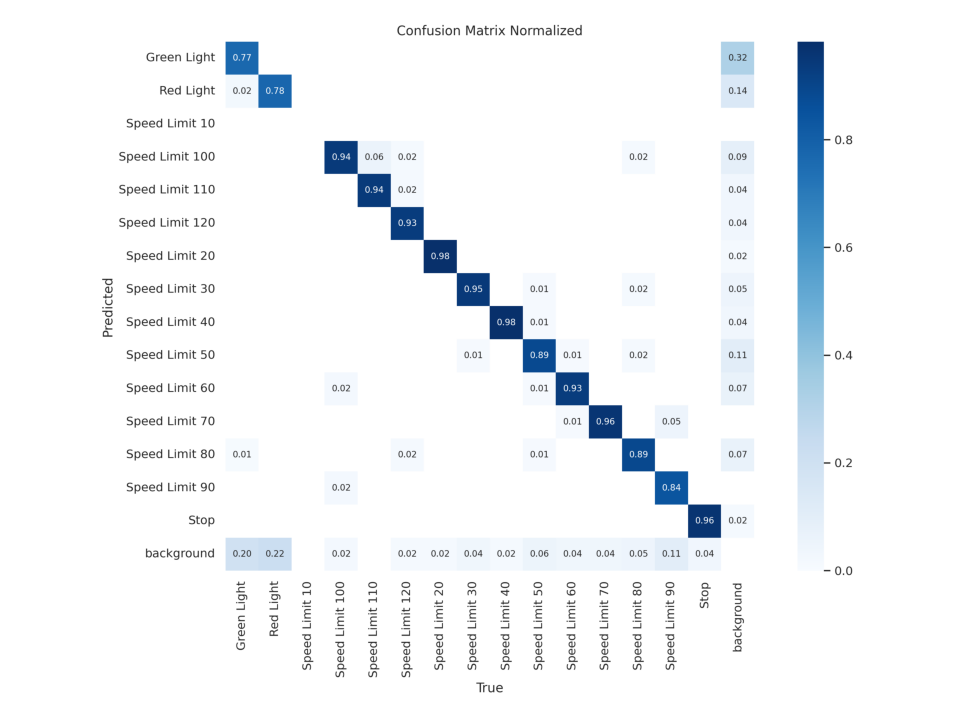

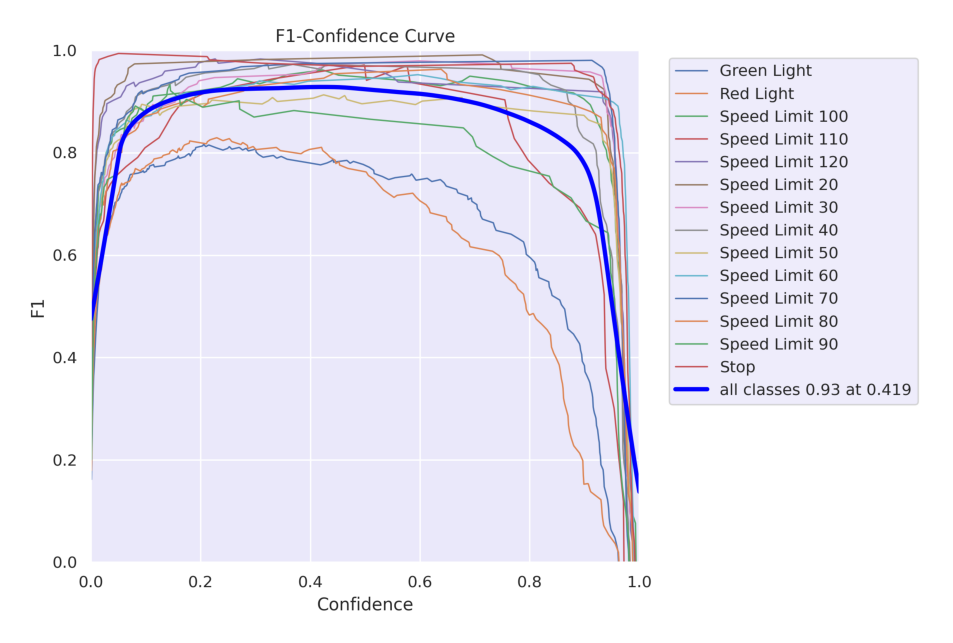

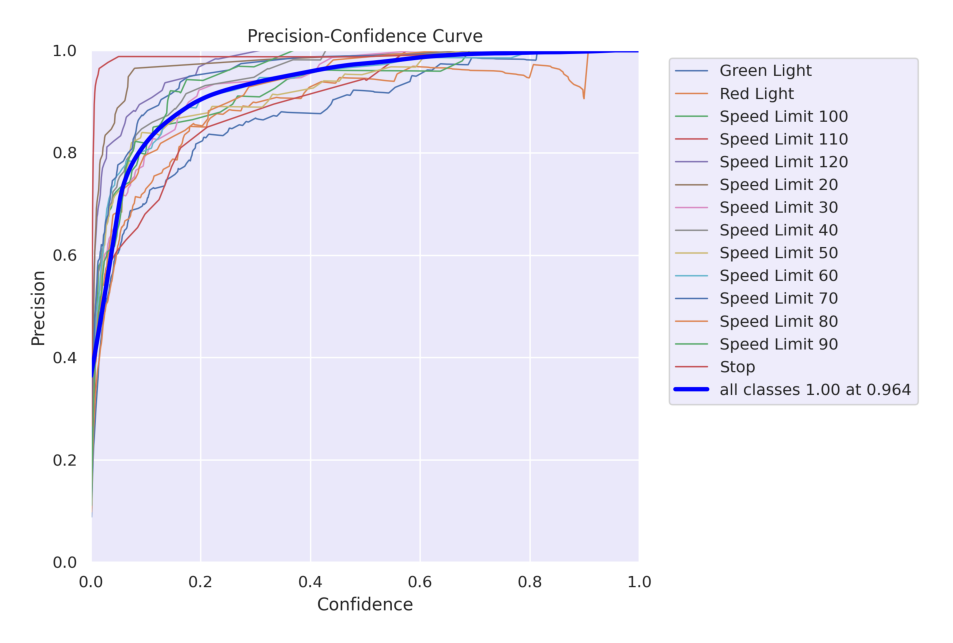

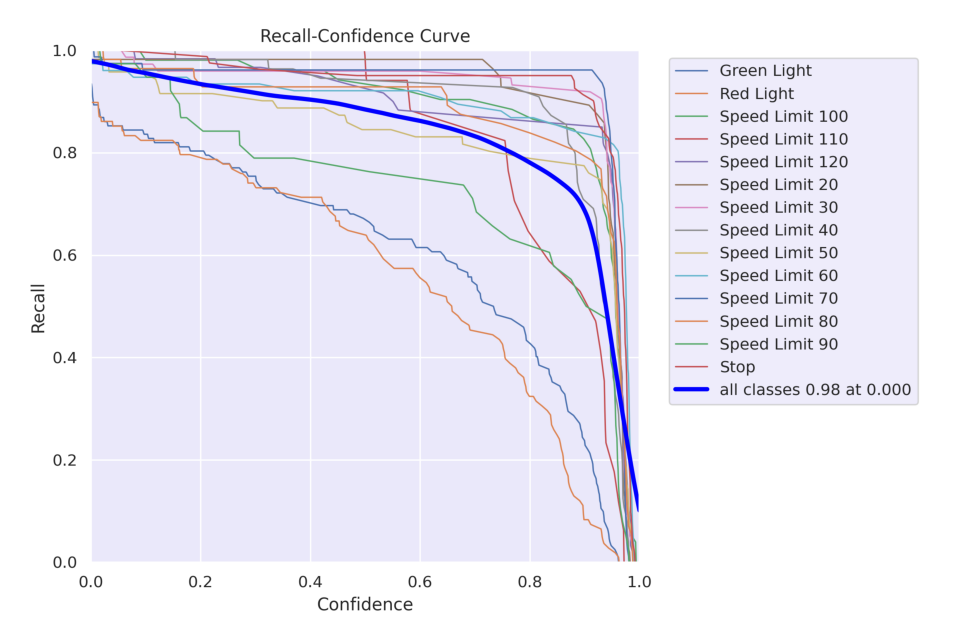

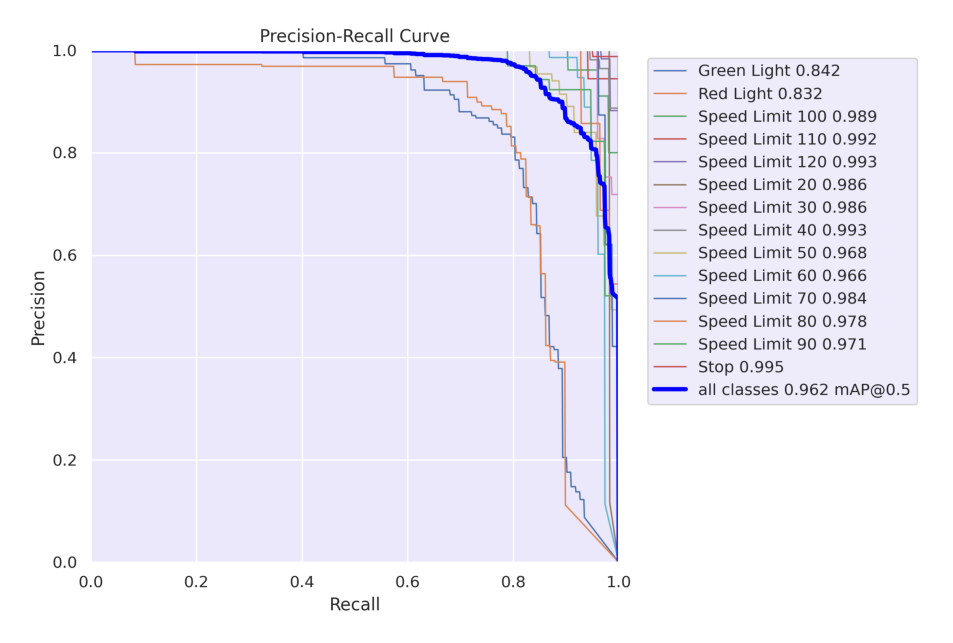

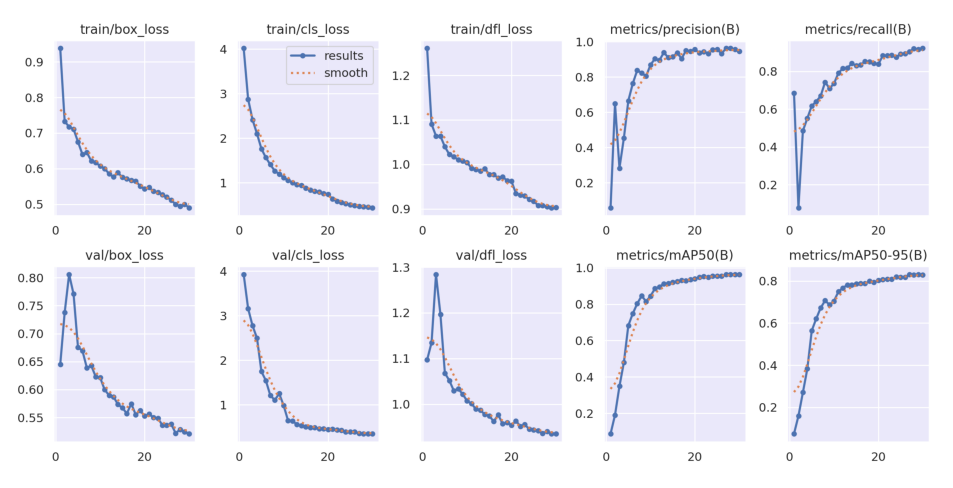

In [29]:
import os
import cv2
import matplotlib.pyplot as plt

def display_images(post_training_files_path, image_files):

    for image_file in image_files:
        image_path = os.path.join(post_training_files_path, image_file)
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        plt.figure(figsize=(10, 10), dpi=120)
        plt.imshow(img)
        plt.axis('off')
        plt.show()

# List of image files to display
image_files = [
    'confusion_matrix_normalized.png',
    'F1_curve.png',
    'P_curve.png',
    'R_curve.png',
    'PR_curve.png',
    'results.png'
]

# Path to the directory containing the images
post_training_files_path = '/kaggle/working/runs/detect/train'

# Display the images
display_images(post_training_files_path, image_files)


In [30]:
Result_Final_model = pd.read_csv('/kaggle/working/runs/detect/train/results.csv')
Result_Final_model.tail(10)

epoch      time  train/box_loss  train/cls_loss  train/dfl_loss  \
20     21   731.150         0.54723         0.64018         0.93497   
21     22   764.509         0.53636         0.58601         0.93151   
22     23   797.819         0.53300         0.55871         0.92948   
23     24   831.522         0.52663         0.53034         0.92109   
24     25   865.132         0.52000         0.51202         0.91711   
25     26   898.415         0.51152         0.49331         0.90799   
26     27   931.484         0.49971         0.47185         0.90777   
27     28   964.725         0.49465         0.46389         0.90478   
28     29   997.823         0.49988         0.45198         0.90275   
29     30  1031.040         0.49030         0.44225         0.90309   

    metrics/precision(B)  metrics/recall(B)  metrics/mAP50(B)  \
20               0.93626            0.88256           0.94892   
21               0.94314            0.88395           0.95202   
22               0.93306            0.88454           0.94880   
23               0.95453            0.87420           0.95446   
24               0.95598            0.89215           0.95536   
25               0.93203            0.89402           0.95383   
26               0.96241            0.90364           0.96319   
27               0.96208            0.91978           0.96266   
28               0.95609            0.91527           0.96389   
29               0.94602            0.92182           0.96301   

    metrics/mAP50-95(B)  val/box_loss  val/cls_loss  val/dfl_loss    lr/pg0  \
20              0.80763       0.55612       0.45366       0.96370  0.000179   
21              0.80967       0.55029       0.44375       0.95189  0.000161   
22              0.80918       0.54869       0.43276       0.95538  0.000144   
23              0.81931       0.53627       0.39211       0.94564  0.000127   
24              0.81840       0.53649       0.39282       0.94373  0.000109   
25              0.81913       0.53799       0.39902       0.94265  0.000092   
26              0.83170       0.52187       0.36436       0.93653  0.000075   
27              0.83025       0.52889       0.35321       0.94076  0.000057   
28              0.83107       0.52437       0.35225       0.93541  0.000040   
29              0.82940       0.52093       0.35263       0.93546  0.000023   

      lr/pg1    lr/pg2  
20  0.000179  0.000179  
21  0.000161  0.000161  
22  0.000144  0.000144  
23  0.000127  0.000127  
24  0.000109  0.000109  
25  0.000092  0.000092  
26  0.000075  0.000075  
27  0.000057  0.000057  
28  0.000040  0.000040  
29  0.000023  0.000023

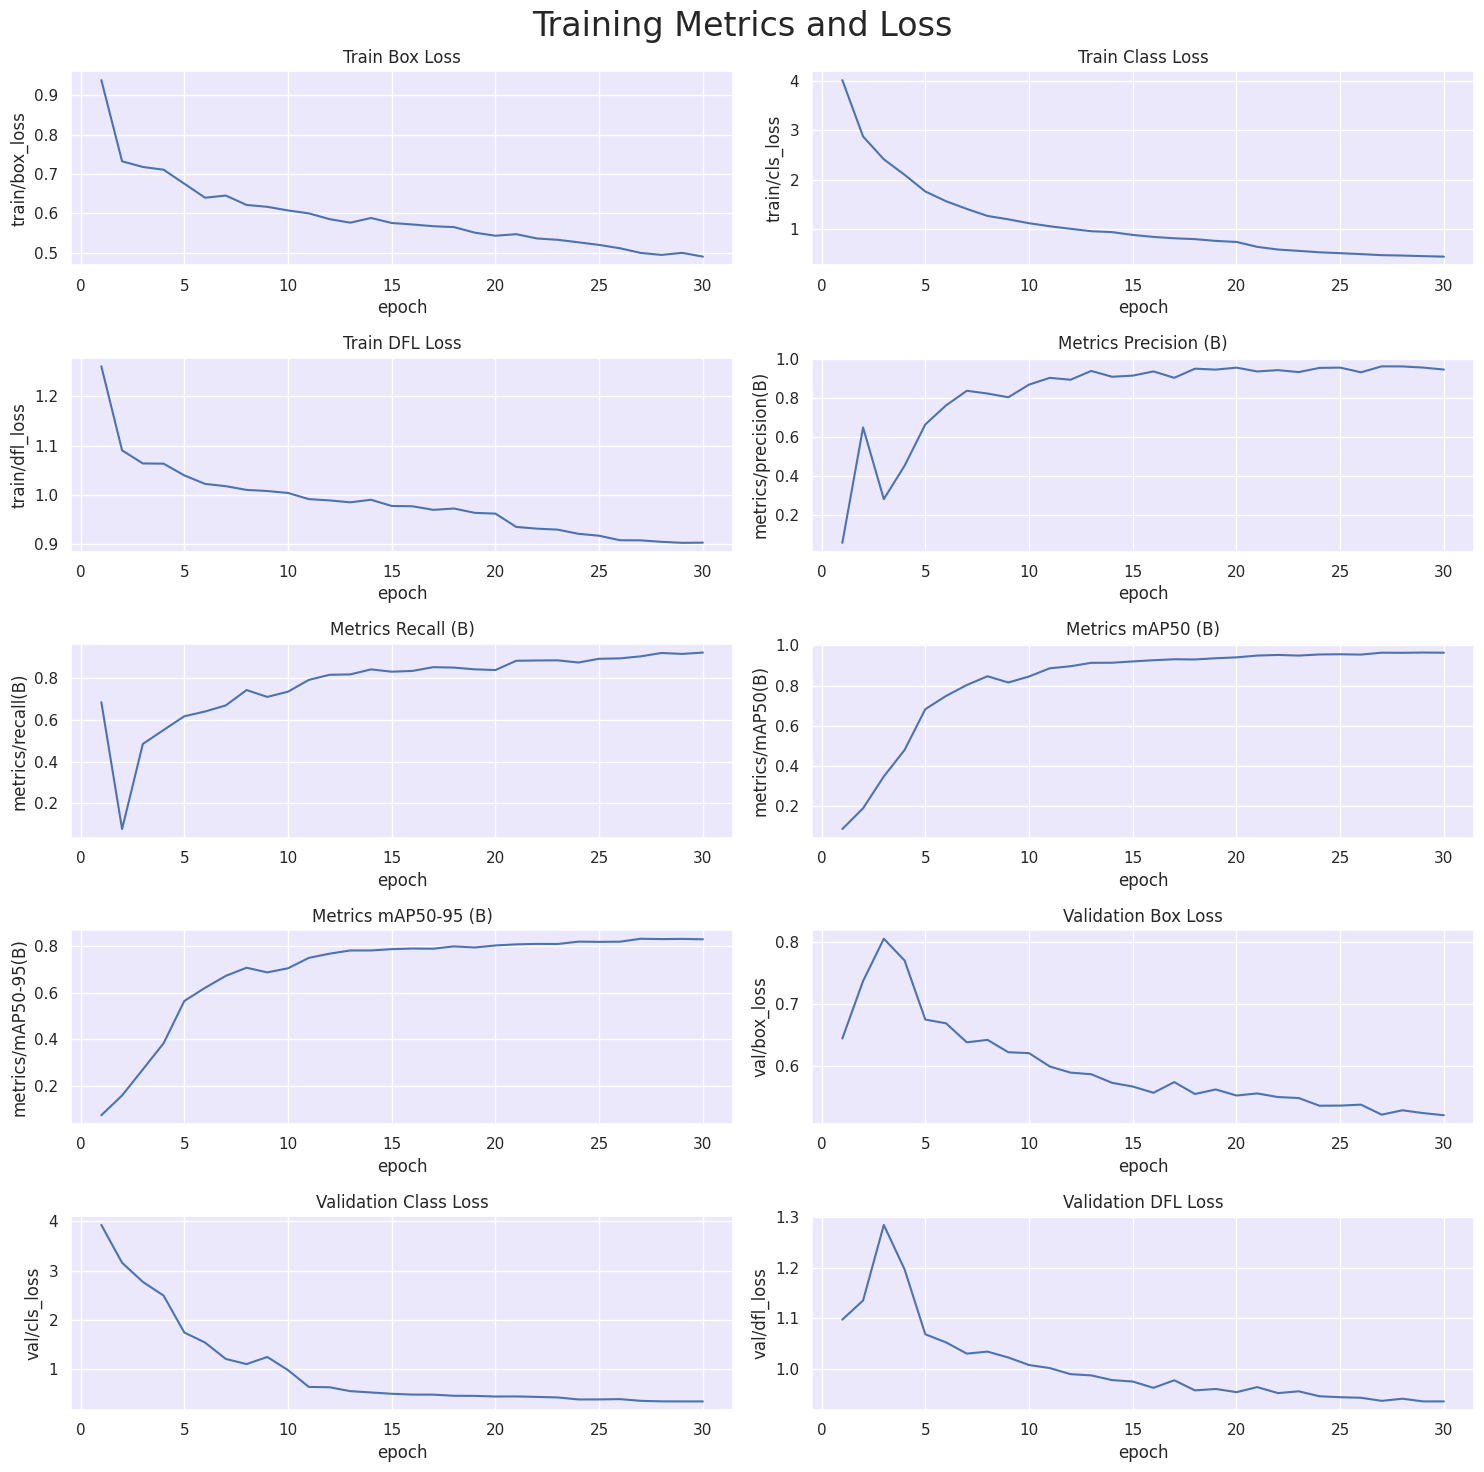

In [31]:
# Read the results.csv file as a pandas dataframe
Result_Final_model.columns = Result_Final_model.columns.str.strip()

# Create subplots
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))

# Plot the columns using seaborn
sns.lineplot(x='epoch', y='train/box_loss', data=Result_Final_model, ax=axs[0,0])
sns.lineplot(x='epoch', y='train/cls_loss', data=Result_Final_model, ax=axs[0,1])
sns.lineplot(x='epoch', y='train/dfl_loss', data=Result_Final_model, ax=axs[1,0])
sns.lineplot(x='epoch', y='metrics/precision(B)', data=Result_Final_model, ax=axs[1,1])
sns.lineplot(x='epoch', y='metrics/recall(B)', data=Result_Final_model, ax=axs[2,0])
sns.lineplot(x='epoch', y='metrics/mAP50(B)', data=Result_Final_model, ax=axs[2,1])
sns.lineplot(x='epoch', y='metrics/mAP50-95(B)', data=Result_Final_model, ax=axs[3,0])
sns.lineplot(x='epoch', y='val/box_loss', data=Result_Final_model, ax=axs[3,1])
sns.lineplot(x='epoch', y='val/cls_loss', data=Result_Final_model, ax=axs[4,0])
sns.lineplot(x='epoch', y='val/dfl_loss', data=Result_Final_model, ax=axs[4,1])

# Set titles and axis labels for each subplot
axs[0,0].set(title='Train Box Loss')
axs[0,1].set(title='Train Class Loss')
axs[1,0].set(title='Train DFL Loss')
axs[1,1].set(title='Metrics Precision (B)')
axs[2,0].set(title='Metrics Recall (B)')
axs[2,1].set(title='Metrics mAP50 (B)')
axs[3,0].set(title='Metrics mAP50-95 (B)')
axs[3,1].set(title='Validation Box Loss')
axs[4,0].set(title='Validation Class Loss')
axs[4,1].set(title='Validation DFL Loss')


plt.suptitle('Training Metrics and Loss', fontsize=24)
plt.subplots_adjust(top=0.8)
plt.tight_layout()
plt.show()

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#e61227''>5.2 |</span></b> Validation of the Model By TestSet </b></p>
</div>

In [32]:
# Loading the best performing model
Valid_model = YOLO('/kaggle/working/runs/detect/train/weights/best.pt')

# Evaluating the model on the validset
metrics = Valid_model.val(split = 'val')

# final results 
print("precision(B): ", metrics.results_dict["metrics/precision(B)"])
print("metrics/recall(B): ", metrics.results_dict["metrics/recall(B)"])
print("metrics/mAP50(B): ", metrics.results_dict["metrics/mAP50(B)"])
print("metrics/mAP50-95(B): ", metrics.results_dict["metrics/mAP50-95(B)"])

Ultralytics 8.3.107 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Model summary (fused): 72 layers, 3,008,573 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /kaggle/input/cardetection/car/valid/labels... 801 images, 0 backgrounds, 0 corrupt: 100%|██████████| 801/801 [00:00<00:00, 811.84it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/cardetection/car/valid is not writeable, cache not saved.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:05<00:00,  9.06it/s]


                   all        801        944      0.963      0.903      0.963      0.832
           Green Light         87        122      0.878      0.697      0.847       0.49
             Red Light         74        108      0.939      0.711      0.826      0.491
       Speed Limit 100         52         52       0.96      0.962      0.989      0.891
       Speed Limit 110         17         17      0.921          1      0.992      0.915
       Speed Limit 120         60         60          1      0.948      0.993      0.924
        Speed Limit 20         56         56      0.987      0.982      0.986      0.876
        Speed Limit 30         71         74      0.974      0.959      0.986      0.928
        Speed Limit 40         53         55      0.985      0.945      0.993      0.886
        Speed Limit 50         68         71      0.938      0.887      0.968      0.858
        Speed Limit 60         76         76      0.961      0.921      0.968      0.883
        Speed Limit 7

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#e61227''>5.3 |</span></b> Making Predictions On Test Images </b></p>
</div>


0: 640x640 1 Speed Limit 50, 1 Speed Limit 80, 5.8ms
Speed: 4.6ms preprocess, 5.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Speed Limit 110, 5.8ms
Speed: 1.5ms preprocess, 5.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Speed Limit 120, 5.4ms
Speed: 1.6ms preprocess, 5.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Speed Limit 40, 5.5ms
Speed: 1.6ms preprocess, 5.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Speed Limit 120, 5.5ms
Speed: 2.1ms preprocess, 5.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Speed Limit 120, 5.8ms
Speed: 2.2ms preprocess, 5.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Stop, 5.5ms
Speed: 2.6ms preprocess, 5.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Speed Limit 80, 5.4ms
Speed: 4.5ms preprocess, 5.4

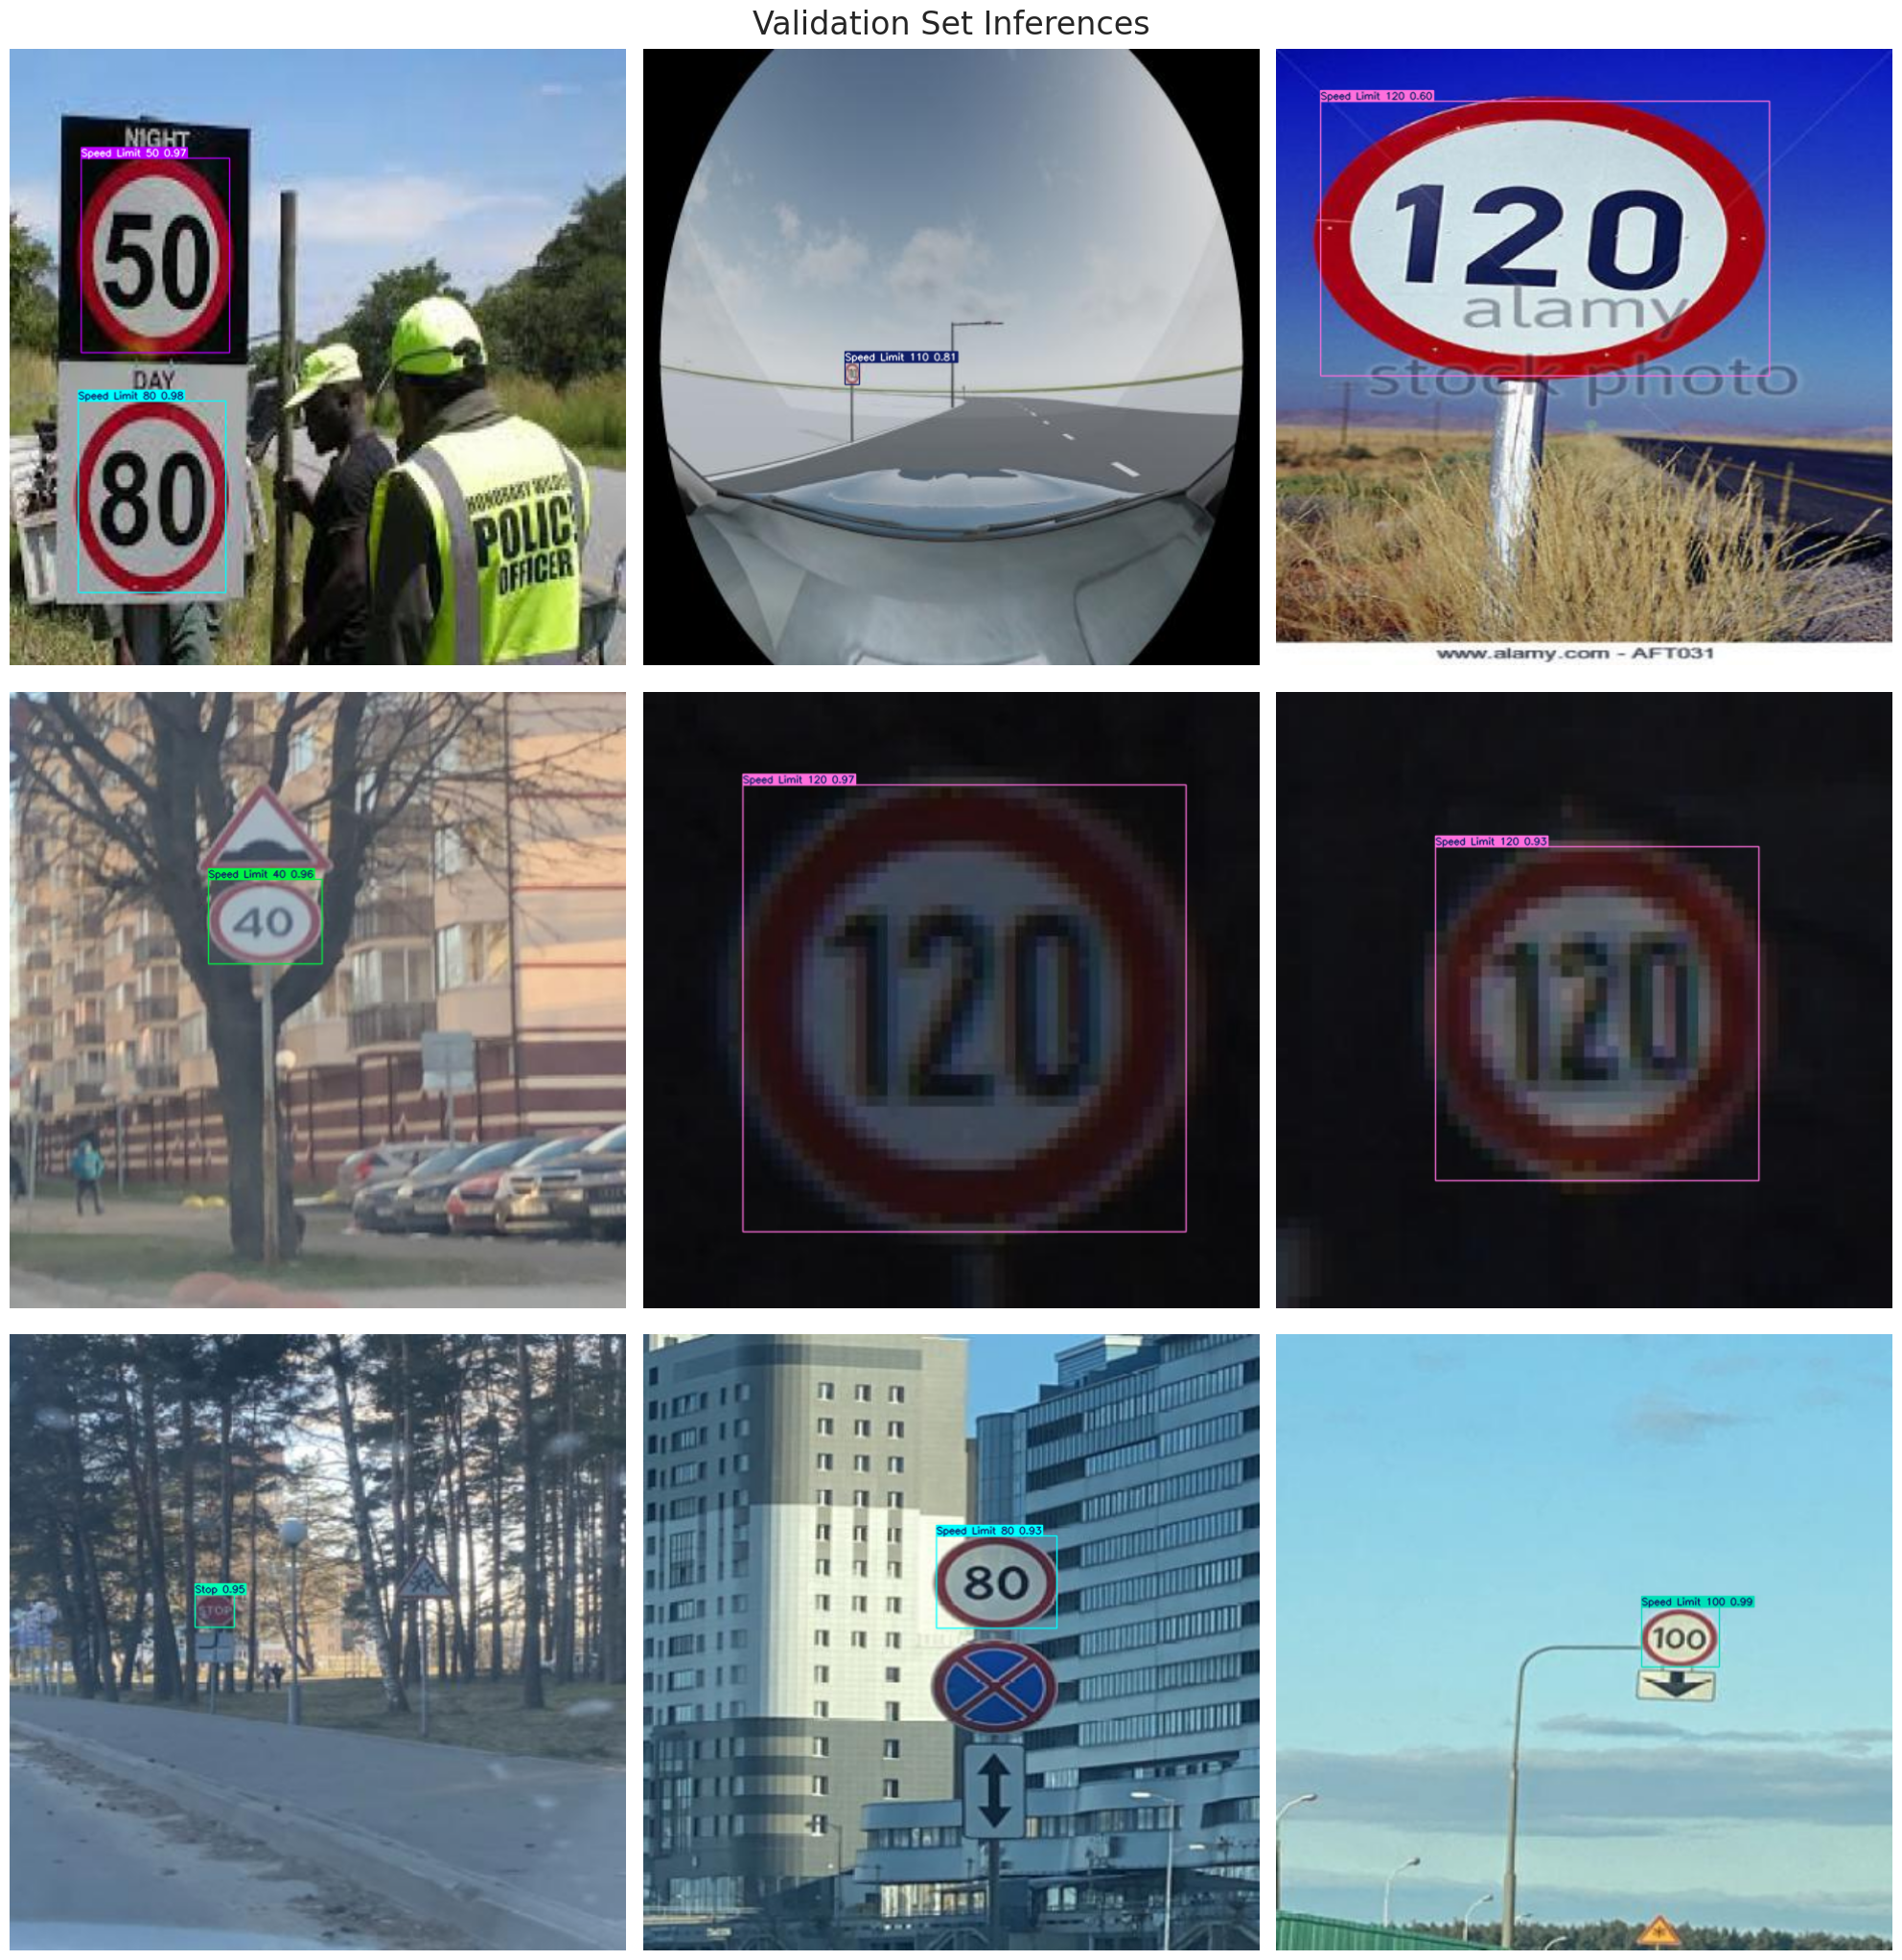

In [33]:
# Normalization function
def normalize_image(image):
    return image / 255.0

# Image resizing function
def resize_image(image, size=(640, 640)):
    return cv2.resize(image, size)

# Path to validation images
dataset_path = '/kaggle/input/cardetection/car'  # Place your dataset path here
valid_images_path = os.path.join(dataset_path, 'test', 'images')

# List of all jpg images in the directory
image_files = [file for file in os.listdir(valid_images_path) if file.endswith('.jpg')]

# Check if there are images in the directory
if len(image_files) > 0:
    # Select 9 images at equal intervals
    num_images = len(image_files)
    step_size = max(1, num_images // 9)  # Ensure the interval is at least 1
    selected_images = [image_files[i] for i in range(0, num_images, step_size)]

    # Prepare subplots
    fig, axes = plt.subplots(3, 3, figsize=(20, 21))
    fig.suptitle('Validation Set Inferences', fontsize=24)

    for i, ax in enumerate(axes.flatten()):
        if i < len(selected_images):
            image_path = os.path.join(valid_images_path, selected_images[i])
            
            # Load image
            image = cv2.imread(image_path)
            
            # Check if the image is loaded correctly
            if image is not None:
                # Resize image
                resized_image = resize_image(image, size=(640, 640))
                # Normalize image
                normalized_image = normalize_image(resized_image)
                
                # Convert the normalized image to uint8 data type
                normalized_image_uint8 = (normalized_image * 255).astype(np.uint8)
                
                # Predict with the model
                results = Valid_model.predict(source=normalized_image_uint8, imgsz=640, conf=0.5)
                
                # Plot image with labels
                annotated_image = results[0].plot(line_width=1)
                annotated_image_rgb = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)
                ax.imshow(annotated_image_rgb)
            else:
                print(f"Failed to load image {image_path}")
        ax.axis('off')

    plt.tight_layout()
    plt.show()


## <b>6 <span style='color:#e61227'>|</span> Try Pre-trained YOLOv8 For Detect Traffic Signs From Video  </b>
<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#e61227'>6.1 |</span></b> Show Original Video Before Detect </b></p>
</div>

**Tip: Due to the substantial volume of the video generated from the image dataset, I have to utilize only a truncated segment of the original video for this project.**

In [34]:
# Convert mp4
!ffmpeg -y -loglevel panic -i /kaggle/input/cardetection/video.mp4 output.mp4## <b>6 <span style='color:#e61227'>|</span> Export The Final Model Of Detect Traffic Signs </b>

**Tip:** The ultimate goal of training a model is to deploy it for real-world applications. Export mode in Ultralytics YOLOv8 offers a versatile range of options for exporting your trained model to different formats, making it deployable across various platforms and devices.

# Display the video
Video("output.mp4", width=960)

SyntaxError: invalid syntax (4192832793.py, line 4)

In [ ]:
# Use the model to detect signs
Valid_model.predict(source="/kaggle/input/cardetection/video.mp4", show=True,save = True)

In [ ]:
# show result
# Convert format
!ffmpeg -y -loglevel panic -i /kaggle/working/runs/detect/predict/video.avi result_out.mp4

# Display the video 
Video("result_out.mp4", width=960)

## <b>7 <span style='color:#e61227'>|</span> Save Model  </b>
<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#e61227'></span></b> </b></p>
</div>

In [ ]:
# Export the model
Valid_model.export(format='onnx')


<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#e61227'></span></b> Thank you for taking the time to review my notebook! If you have any questions or criticisms, please kindly let me know in the comments section !!!!  </b></p>
</div>
